<a href="https://colab.research.google.com/github/t-abs/Machine-Learning/blob/main/Assumption_LR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/multiple_linear_regression (1).csv")

In [6]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Data Preprocessing(checking null values)

In [7]:
data=data.dropna()
data.shape

(200, 4)

Splitting the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.dropna()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
data.shape

(200, 4)



>SPLITTING DATA


```



In [11]:
output_col = "Target"

In [12]:
x = data.iloc[:, data.columns != output_col]
#x = data.iloc[:, [0, 1]]

In [13]:
y = data.loc[:, output_col]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test      = train_test_split(x,y,test_size=0.30,random_state=43)

In [15]:
x_train

,Feature 1,Feature 2,Feature 3
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [16]:
y_train

71     12.4
90     11.2
100    11.7
44      8.5
94     11.5
       ... 
58     23.8
21     12.5
49      9.7
64     18.0
68     18.9
Name: Target, Length: 140, dtype: float64

LINEAR REGRESSION MODEL TRAINING

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [21]:
lr.intercept_

3.0777744955280433

PREDICTING THE TEST

In [22]:
predicted_value=lr.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(y_test,predicted_value)

In [24]:
cost

2.2412862530933473

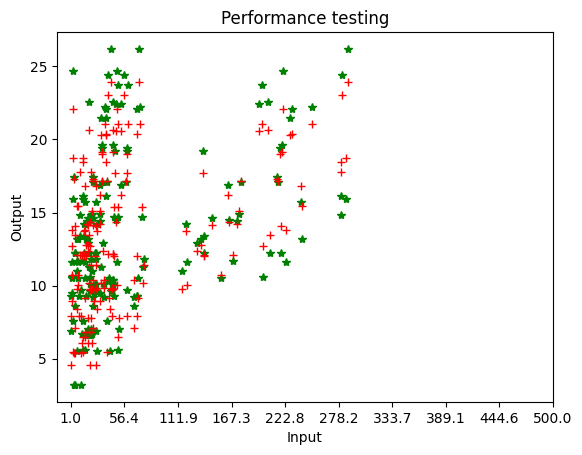

In [25]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

ASSUMPTIONS OF LINEAR REGRESSION

HOMODAESTICITY

In [26]:
predicted_value

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [28]:
print(y_test)

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
116    12.2
138     9.6
155     3.2
82     11.3
160    14.4
181    12.2
171    14.5
12      9.2
55     23.7
77     14.2
22      5.6
129     9.7
105    19.2
102    14.8
159    12.9
9      10.6
15     22.4
150    16.1
76      6.9
119     6.6
Name: Target, dtype: float64


In [29]:
#error
residuals=y_test-predicted_value

In [30]:
residuals

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
65     1.368841
17     1.327562
133    0.442702
195    2.123225
146   -2.221023
38     0.277943
173   -0.380236
149    0.339051
93     1.122823
29     1.360550
0      1.737942
2     -2.738627
122   -2.180821
180   -0.232255
95     0.699385
121   -0.770427
185    1.974879
39     1.180337
66     0.527340
19     0.462538
11     0.116186
45    -0.238272
41    -0.083768
92     0.366254
168   -0.039522
1     -1.746705
57     0.418405
189    0.618645
151    1.533650
167   -1.289216
116    0.184502
138   -0.101073
155   -2.153987
82     1.150338
160    0.175804
181   -1.847809
171    0.169465
12    -1.194657
55     2.655820
77     0.452965
22    -0.865117
129    1.794492
105    1.501334
102   -2.946682
159    0.505011
9     -2.093458
15     1.810533
150   -2.326901
76     2.308544
119   -0.221298
Name: Target, dtype: float64

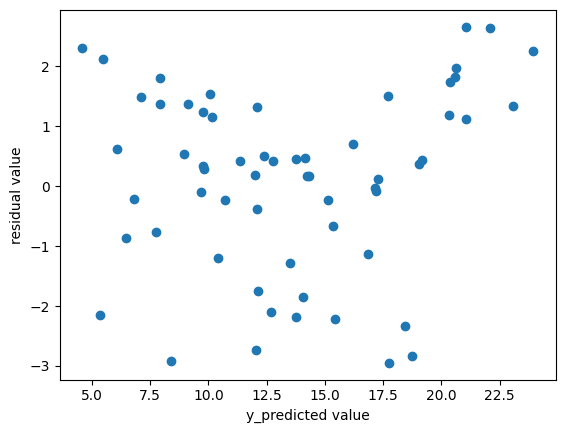

In [31]:
plt.scatter(predicted_value,residuals)
plt.xlabel("y_predicted value")
plt.ylabel("residual value")
plt.show()

NORMALITY OF RESIDUALS

<ipython-input-34-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Target', ylabel='Density'>

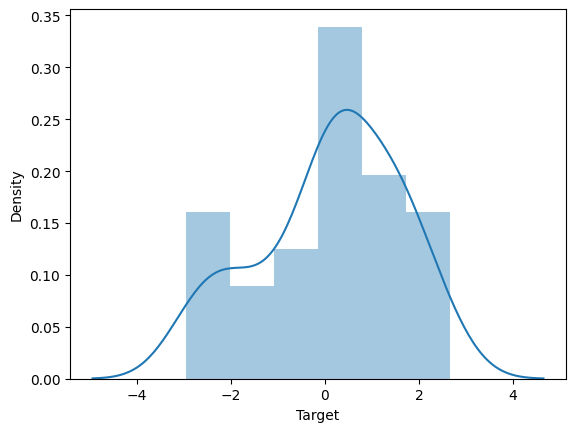

In [34]:
sns.distplot(residuals)